In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df=pd.read_csv('Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.shape

(2930, 81)

In [4]:
df.corr()['SalePrice'].sort_values(ascending=False)

C:\Users\power\AppData\Local\Temp\ipykernel_5096\1823528897.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values(ascending=False)


SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

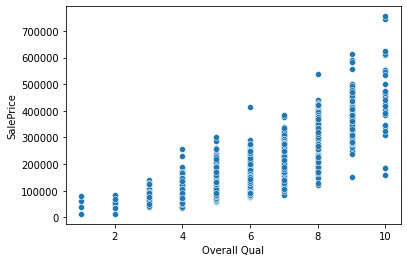

In [5]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)
plt.show()

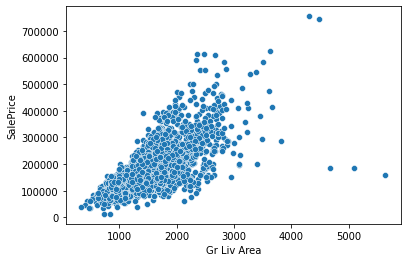

In [6]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)
plt.show()

In [7]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [8]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [9]:
drop_index=df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)].index
df=df.drop(drop_index,axis=0)

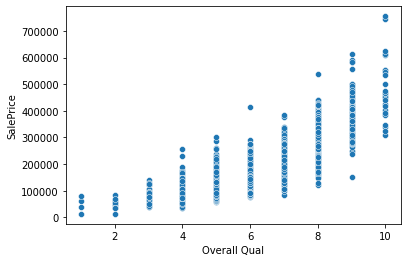

In [10]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)
plt.show()

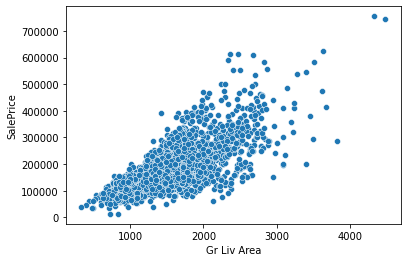

In [11]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)
plt.show()

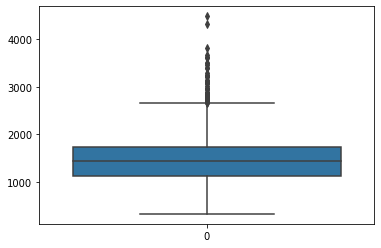

In [12]:
sns.boxplot(df['Gr Liv Area'])
plt.show()

In [13]:
df1=df[df['Gr Liv Area']>2600]
df1.shape

(94, 81)

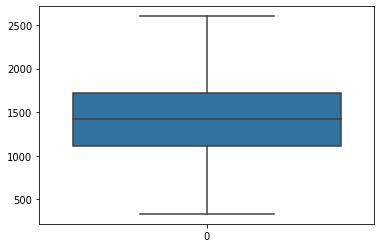

In [14]:
df=df[df['Gr Liv Area']<2600]
sns.boxplot(df['Gr Liv Area'])
plt.show()

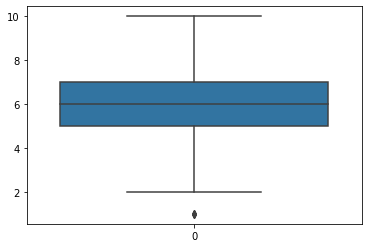

In [15]:
sns.boxplot(df['Overall Qual'])
plt.show()

In [16]:
df2=df[df['Overall Qual']<2]
df2.shape

(4, 81)

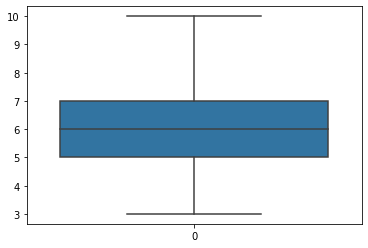

In [17]:
df=df[df['Overall Qual']>2]
sns.boxplot(df['Overall Qual'])
plt.show()

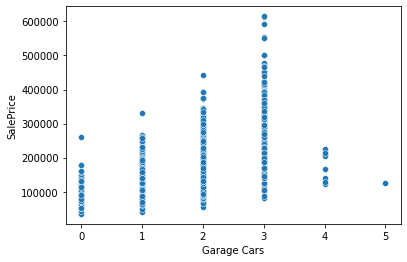

In [18]:
sns.scatterplot(x='Garage Cars',y='SalePrice',data=df)
plt.show()

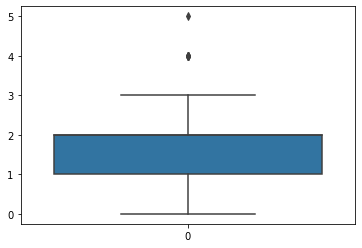

In [19]:
sns.boxplot(df['Garage Cars'])
plt.show()

In [20]:
df3=df[df['Garage Cars']>3.5]
df3.shape

(10, 81)

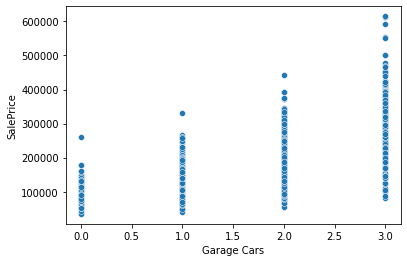

In [21]:
df=df[df['Garage Cars']<3.5]
sns.scatterplot(x='Garage Cars',y='SalePrice',data=df)
plt.show()

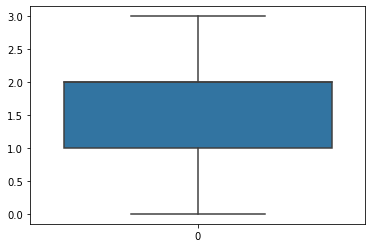

In [22]:
sns.boxplot(df['Garage Cars'])
plt.show()

In [23]:
drop_features=['Half Bath','Bsmt Full Bath','2nd Flr SF','Lot Area','Bsmt Unf SF','Bedroom AbvGr',
               'Screen Porch','Pool Area','Mo Sold','3Ssn Porch','BsmtFin SF 2','Misc Val',
               'Yr Sold','Bsmt Half Bath','Low Qual Fin SF','MS SubClass','Overall Cond',
               'Kitchen AbvGr','Enclosed Porch','PID']

In [24]:
df=df.drop(drop_features,axis=1)
df.head()

,MS Zoning,Lot Frontage,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,141.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,TA,P,210,62,NaN,NaN,NaN,WD,Normal,215000
1,RH,80.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,Y,140,0,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,81.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,TA,Y,393,36,NaN,NaN,Gar2,WD,Normal,172000
3,RL,93.0,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,TA,Y,0,0,NaN,NaN,NaN,WD,Normal,244000
4,RL,74.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,TA,Y,212,34,NaN,MnPrv,NaN,WD,Normal,189900


In [25]:
df.shape

(2805, 61)

In [26]:
df.corr()['SalePrice'].sort_values(ascending=False)

C:\Users\power\AppData\Local\Temp\ipykernel_5096\1823528897.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values(ascending=False)


SalePrice         1.000000
Overall Qual      0.806191
Gr Liv Area       0.677343
Garage Cars       0.661391
Total Bsmt SF     0.653264
Garage Area       0.653199
1st Flr SF        0.628236
Year Built        0.596890
Garage Yr Blt     0.549061
Year Remod/Add    0.546993
Full Bath         0.515221
Mas Vnr Area      0.465315
Fireplaces        0.459159
BsmtFin SF 1      0.450550
TotRms AbvGrd     0.423442
Lot Frontage      0.346904
Open Porch SF     0.321539
Wood Deck SF      0.300754
Name: SalePrice, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 2929
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS Zoning       2805 non-null   object 
 1   Lot Frontage    2337 non-null   float64
 2   Street          2805 non-null   object 
 3   Alley           191 non-null    object 
 4   Lot Shape       2805 non-null   object 
 5   Land Contour    2805 non-null   object 
 6   Utilities       2805 non-null   object 
 7   Lot Config      2805 non-null   object 
 8   Land Slope      2805 non-null   object 
 9   Neighborhood    2805 non-null   object 
 10  Condition 1     2805 non-null   object 
 11  Condition 2     2805 non-null   object 
 12  Bldg Type       2805 non-null   object 
 13  House Style     2805 non-null   object 
 14  Overall Qual    2805 non-null   int64  
 15  Year Built      2805 non-null   int64  
 16  Year Remod/Add  2805 non-null   int64  
 17  Roof Style      2805 non-null   o

In [28]:
df.isnull().sum()

MS Zoning            0
Lot Frontage       468
Street               0
Alley             2614
Lot Shape            0
                  ... 
Fence             2249
Misc Feature      2705
Sale Type            0
Sale Condition       0
SalePrice            0
Length: 61, dtype: int64

In [29]:
a=pd.DataFrame(df.isnull().sum())
a

,0
MS Zoning,0
Lot Frontage,468
Street,0
Alley,2614
Lot Shape,0
...,...
Fence,2249
Misc Feature,2705
Sale Type,0
Sale Condition,0


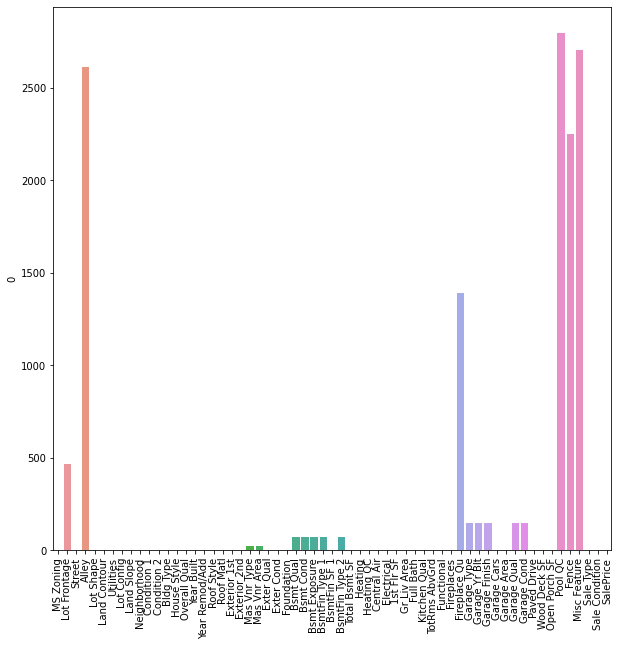

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x=a.index,y=a[0])
plt.xticks(rotation=90)
plt.show()

In [31]:
b=a[a[0]>0]
b

,0
Lot Frontage,468
Alley,2614
Mas Vnr Type,23
Mas Vnr Area,23
Bsmt Qual,70
Bsmt Cond,70
Bsmt Exposure,73
BsmtFin Type 1,70
BsmtFin SF 1,1
BsmtFin Type 2,71


In [32]:
b

,0
Lot Frontage,468
Alley,2614
Mas Vnr Type,23
Mas Vnr Area,23
Bsmt Qual,70
Bsmt Cond,70
Bsmt Exposure,73
BsmtFin Type 1,70
BsmtFin SF 1,1
BsmtFin Type 2,71


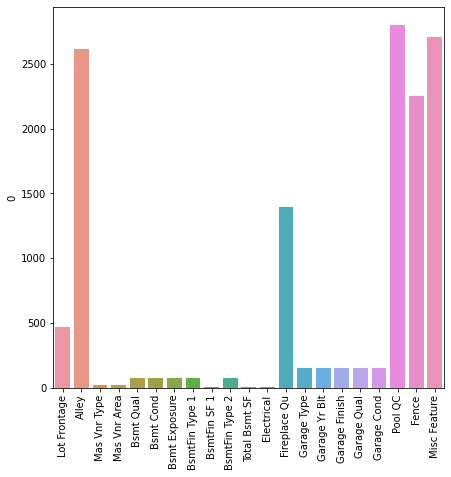

In [33]:
plt.figure(figsize=(7,7))
sns.barplot(x=b.index,y=b[0])
plt.xticks(rotation=90)
plt.show()

In [34]:
c=b[b[0]<50]
c

,0
Mas Vnr Type,23
Mas Vnr Area,23
BsmtFin SF 1,1
Total Bsmt SF,1
Electrical,1


In [35]:
df=df.dropna(axis=0,subset=['Electrical','Total Bsmt SF','BsmtFin SF 1'])
df[df['Electrical'].isnull()]

,MS Zoning,Lot Frontage,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice


In [36]:
a=pd.DataFrame(df.isnull().sum())
a

,0
MS Zoning,0
Lot Frontage,468
Street,0
Alley,2612
Lot Shape,0
...,...
Fence,2248
Misc Feature,2703
Sale Type,0
Sale Condition,0


In [37]:
b=a[a[0]>0]
c=b[b[0]<100]
c

,0
Mas Vnr Type,23
Mas Vnr Area,23
Bsmt Qual,69
Bsmt Cond,69
Bsmt Exposure,72
BsmtFin Type 1,69
BsmtFin Type 2,70


In [38]:
df['Bsmt Qual']

0       TA
1       TA
2       TA
3       TA
4       Gd
        ..
2925    TA
2926    Gd
2927    Gd
2928    Gd
2929    Gd
Name: Bsmt Qual, Length: 2803, dtype: object

In [39]:
df['Bsmt Cond']

0       Gd
1       TA
2       TA
3       TA
4       TA
        ..
2925    TA
2926    TA
2927    TA
2928    TA
2929    TA
Name: Bsmt Cond, Length: 2803, dtype: object

In [40]:
df['Bsmt Exposure']

0       Gd
1       No
2       No
3       No
4       No
        ..
2925    Av
2926    Av
2927    Av
2928    Av
2929    Av
Name: Bsmt Exposure, Length: 2803, dtype: object

In [41]:
bsmt_str_cols=['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df[bsmt_str_cols]=df[bsmt_str_cols].fillna('None')

In [42]:
a=pd.DataFrame(df.isnull().sum())
a

,0
MS Zoning,0
Lot Frontage,468
Street,0
Alley,2612
Lot Shape,0
...,...
Fence,2248
Misc Feature,2703
Sale Type,0
Sale Condition,0


In [43]:
b=a[a[0]>0]
c=b[b[0]<100]
c

,0
Mas Vnr Type,23
Mas Vnr Area,23


In [44]:
df['Mas Vnr Type']

0         Stone
1          None
2       BrkFace
3          None
4          None
         ...   
2925       None
2926       None
2927       None
2928       None
2929    BrkFace
Name: Mas Vnr Type, Length: 2803, dtype: object

In [45]:
df['Mas Vnr Area']

0       112.0
1         0.0
2       108.0
3         0.0
4         0.0
        ...  
2925      0.0
2926      0.0
2927      0.0
2928      0.0
2929     94.0
Name: Mas Vnr Area, Length: 2803, dtype: float64

In [46]:
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area']=df['Mas Vnr Area'].fillna(0)

In [47]:
a=pd.DataFrame(df.isnull().sum())
b=a[a[0]>0]
c=b[b[0]<100]
c

,0


In [48]:
c=b[b[0]>100]
c

,0
Lot Frontage,468
Alley,2612
Fireplace Qu,1391
Garage Type,149
Garage Yr Blt,150
Garage Finish,150
Garage Qual,150
Garage Cond,150
Pool QC,2797
Fence,2248


In [49]:
df['Garage Type']

0       Attchd
1       Attchd
2       Attchd
3       Attchd
4       Attchd
         ...  
2925    Detchd
2926    Attchd
2927       NaN
2928    Attchd
2929    Attchd
Name: Garage Type, Length: 2803, dtype: object

In [50]:
df['Garage Yr Blt']

0       1960.0
1       1961.0
2       1958.0
3       1968.0
4       1997.0
         ...  
2925    1984.0
2926    1983.0
2927       NaN
2928    1975.0
2929    1993.0
Name: Garage Yr Blt, Length: 2803, dtype: float64

In [51]:
gar_str_cols=['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[gar_str_cols]=df[gar_str_cols].fillna('None')
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

In [52]:
a=pd.DataFrame(df.isnull().sum())
b=a[a[0]>0]
b

,0
Lot Frontage,468
Alley,2612
Fireplace Qu,1391
Pool QC,2797
Fence,2248
Misc Feature,2703


In [53]:
df.shape

(2803, 61)

In [54]:
df=df.drop(['Alley','Pool QC','Fence','Misc Feature'],axis=1)

In [55]:
a=pd.DataFrame(df.isnull().sum())
b=a[a[0]>0]
b

,0
Lot Frontage,468
Fireplace Qu,1391


In [56]:
df['Fireplace Qu']

0        Gd
1       NaN
2       NaN
3        TA
4        TA
       ... 
2925    NaN
2926    NaN
2927    NaN
2928     TA
2929     TA
Name: Fireplace Qu, Length: 2803, dtype: object

In [57]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna('None')

In [58]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2803, dtype: float64

In [59]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.494505
ClearCr    85.526316
CollgCr    71.284404
Crawfor    69.645570
Edwards    64.511628
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     61.777778
Landmrk          NaN
MeadowV    25.606061
Mitchel    72.764706
NAmes      74.756098
NPkVill    28.142857
NWAmes     81.451220
NoRidge    86.394737
NridgHt    82.075342
OldTown    61.225806
SWISU      58.102564
Sawyer     74.298969
SawyerW    70.147059
Somerst    64.465409
StoneBr    60.552632
Timber     81.303571
Veenker    70.133333
Name: Lot Frontage, dtype: float64

In [60]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [61]:
df.isnull().sum()

MS Zoning         0
Lot Frontage      3
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
Total Bsmt SF     0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
1st Flr SF        0
Gr Liv Area       0
Full Bath         0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0


In [62]:
df['Lot Frontage']=df['Lot Frontage'].fillna(0)

In [63]:
df.isnull().sum()

MS Zoning         0
Lot Frontage      0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
Total Bsmt SF     0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
1st Flr SF        0
Gr Liv Area       0
Full Bath         0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2803 entries, 0 to 2929
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS Zoning       2803 non-null   object 
 1   Lot Frontage    2803 non-null   float64
 2   Street          2803 non-null   object 
 3   Lot Shape       2803 non-null   object 
 4   Land Contour    2803 non-null   object 
 5   Utilities       2803 non-null   object 
 6   Lot Config      2803 non-null   object 
 7   Land Slope      2803 non-null   object 
 8   Neighborhood    2803 non-null   object 
 9   Condition 1     2803 non-null   object 
 10  Condition 2     2803 non-null   object 
 11  Bldg Type       2803 non-null   object 
 12  House Style     2803 non-null   object 
 13  Overall Qual    2803 non-null   int64  
 14  Year Built      2803 non-null   int64  
 15  Year Remod/Add  2803 non-null   int64  
 16  Roof Style      2803 non-null   object 
 17  Roof Matl       2803 non-null   o

In [65]:
my_object_df=df.select_dtypes(include='object')
my_numeric_df=df.select_dtypes(exclude='object')

In [66]:
my_object_df.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


In [67]:
my_numeric_df.head()

,Lot Frontage,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,141.0,6,1960,1960,112.0,639.0,1080.0,1656,1656,1,7,2,1960.0,2.0,528.0,210,62,215000
1,80.0,5,1961,1961,0.0,468.0,882.0,896,896,1,5,0,1961.0,1.0,730.0,140,0,105000
2,81.0,6,1958,1958,108.0,923.0,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0,393,36,172000
3,93.0,7,1968,1968,0.0,1065.0,2110.0,2110,2110,2,8,2,1968.0,2.0,522.0,0,0,244000
4,74.0,5,1997,1998,0.0,791.0,928.0,928,1629,2,6,1,1997.0,2.0,482.0,212,34,189900


In [68]:
my_objects_dummies=pd.get_dummies(my_object_df,drop_first=True)
my_objects_dummies.head()

,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [69]:
final_df=pd.concat([my_numeric_df,my_objects_dummies],axis=1)
final_df.head()

,Lot Frontage,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,6,1960,1960,112.0,639.0,1080.0,1656,1656,1,...,0,0,0,0,1,0,0,0,1,0
1,80.0,5,1961,1961,0.0,468.0,882.0,896,896,1,...,0,0,0,0,1,0,0,0,1,0
2,81.0,6,1958,1958,108.0,923.0,1329.0,1329,1329,1,...,0,0,0,0,1,0,0,0,1,0
3,93.0,7,1968,1968,0.0,1065.0,2110.0,2110,2110,2,...,0,0,0,0,1,0,0,0,1,0
4,74.0,5,1997,1998,0.0,791.0,928.0,928,1629,2,...,0,0,0,0,1,0,0,0,1,0


In [70]:
final_df.shape

(2803, 239)

In [71]:
df.shape

(2803, 57)

In [72]:
final_df.duplicated().sum()

0

In [73]:
X=final_df.drop('SalePrice',axis=1)
y=final_df['SalePrice']

In [74]:
X.std().mean()

11.501861606797318

In [75]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [76]:
X.std().mean()

0.9999999999999999

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
model1=SVR()

In [79]:
param_grid={'C':[1,10,100],'kernel':['linear','rbf'],'gamma':[0.1,0.5,1]}
grid1=GridSearchCV(estimator=model1,param_grid=param_grid,cv=5)
grid1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf']})

In [80]:
grid1.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}

In [81]:
preds1=grid1.predict(X_test)
MAE=mean_absolute_error(preds1,y_test)
r2=r2_score(preds1,y_test)
RMSE = np.sqrt(mean_squared_error(preds1,y_test))
print('Mean Absolute Error is : ', MAE)
print('R Squared Error is : ', r2)
print('RMSE is : ', RMSE)

Mean Absolute Error is :  15762.205122157162
R Squared Error is :  0.8331147766903662
RMSE is :  25944.522509027534


In [82]:
df['SalePrice'].mean()

175796.2590082055

In [83]:
model2=KNeighborsRegressor()

In [84]:
param_grid={'n_neighbors':[7,9,11]}
grid2=GridSearchCV(estimator=model2,param_grid=param_grid,cv=5)
grid2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [7, 9, 11]})

In [85]:
grid2.best_params_

{'n_neighbors': 9}

In [86]:
preds2=grid2.predict(X_test)
MAE=mean_absolute_error(preds2,y_test)
r2=r2_score(preds2,y_test)
RMSE=np.sqrt(mean_squared_error(preds2,y_test))
print('Mean Absolute Error is : ', MAE)
print('R Squared Error is : ', r2)
print('RMSE is : ', RMSE)

Mean Absolute Error is :  23528.841156664686
R Squared Error is :  0.6360550443201329
RMSE is :  36255.136175608626


In [87]:
model3=RandomForestRegressor()

In [88]:
param_grid={'n_estimators':[120,160,180],'max_depth':[14,20,25],'max_features':[25,30,35]}
grid3=GridSearchCV(estimator=model3,param_grid=param_grid,cv=5)
grid3.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [14, 20, 25],
                         'max_features': [25, 30, 35],
                         'n_estimators': [120, 160, 180]})

In [89]:
grid3.best_params_

{'max_depth': 25, 'max_features': 35, 'n_estimators': 180}

In [90]:
preds3=grid3.predict(X_test)
MAE=mean_absolute_error(preds3,y_test)
r2=r2_score(preds3,y_test)
RMSE=np.sqrt(mean_squared_error(preds3,y_test))
print('Mean Absolute Error is : ', MAE)
print('R Squared Error is : ', r2)
print('RMSE is : ', RMSE)

Mean Absolute Error is :  15536.711544697111
R Squared Error is :  0.8701236383702535
RMSE is :  23571.500814378953


In [91]:
model4=Lasso()

In [92]:
model4.fit(X_train,y_train)

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.891e+11, tolerance: 1.082e+09
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [93]:
preds4=model4.predict(X_test)
MAE=mean_absolute_error(preds4,y_test)
r2=r2_score(preds4,y_test)
print('Mean Absolute Error is : ', MAE)
print('R Squared Error is : ', r2)
print('RMSE is : ' , RMSE)

Mean Absolute Error is :  15048.885615108833
R Squared Error is :  0.8959511972929849
RMSE is :  23571.500814378953


In [94]:
type(df['BsmtFin Type 1'])

pandas.core.series.Series

In [96]:
my_object_df['MS Zoning'].unique()

array(['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)'], dtype=object)